## Homework 3: Schelling model

In [45]:
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

from plotly import graph_objs as go
from plotly import express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
def initialize_grid(n: int, blank_ratio: float, x_ratio: float):
    num_cells = n * n
    num_empty = int(num_cells * blank_ratio)
    num_A = int((num_cells - num_empty) * x_ratio)
    num_B = num_cells - num_empty - num_A
    
    grid_list = [0] * num_empty + [1] * num_A + [2] * num_B
    random.shuffle(grid_list)
    
    grid = np.array(grid_list).reshape((n, n))
    return grid

def is_satisfied(grid, x: int, y: int, threshold):
    agent = grid[x, y]
    neighbors = []

    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                neighbors.append(grid[nx, ny])
                
    if len(neighbors) == 0:
        return True

    return (sum(1 for neighbor in neighbors if neighbor == agent) / len(neighbors)) >= threshold

def find_unsatisfied(grid, threshold):
    unsatisfied_agents = []
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] != 0 and not is_satisfied(grid, x, y, threshold):
                unsatisfied_agents.append((x, y))
    return unsatisfied_agents

def move_unsatisfied(grid, unsatisfied_agents: list):
    empty_cells = list(zip(*np.where(grid == 0)))
    for x, y in unsatisfied_agents:
        if empty_cells:
            new_x, new_y = random.choice(empty_cells)
            grid[new_x, new_y] = grid[x, y]
            grid[x, y] = 0
            empty_cells.remove((new_x, new_y))
            empty_cells.append((x, y))

def start_game(n, x_ratio, threshold, max_steps, blank_ratio: float=0):
    grid = initialize_grid(n, blank_ratio, x_ratio)
    results = []
    num_move = []
    for step in range(max_steps):
        results.append(grid.copy())
        unsatisfied_agents = find_unsatisfied(grid=grid, threshold=threshold)
        num_move.append(len(unsatisfied_agents))
        if not unsatisfied_agents:
            print(f"All agents are satisfied in step: {step}")
            return results, step, num_move
        move_unsatisfied(grid, unsatisfied_agents)
        
    return results, max_steps, num_move

### Task 3.1

In [61]:
# Parameters of the model
n = 30
blank_ratio = 0.2
x_ratio = 0.5
R = np.linspace(0.125, 1, 8)
max_steps = 100

All agents are satisfied in step: 2


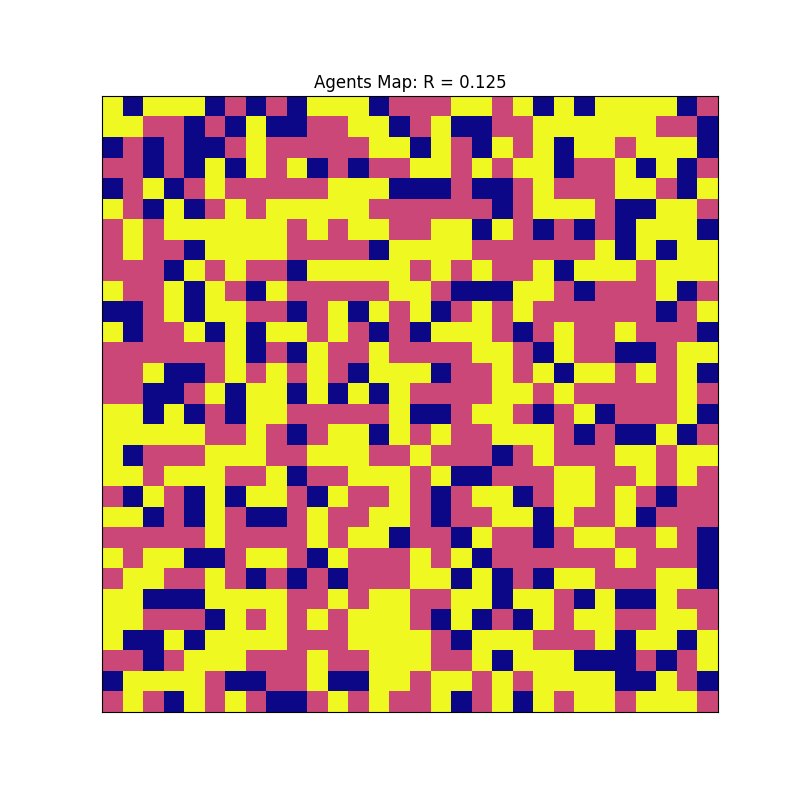

All agents are satisfied in step: 9


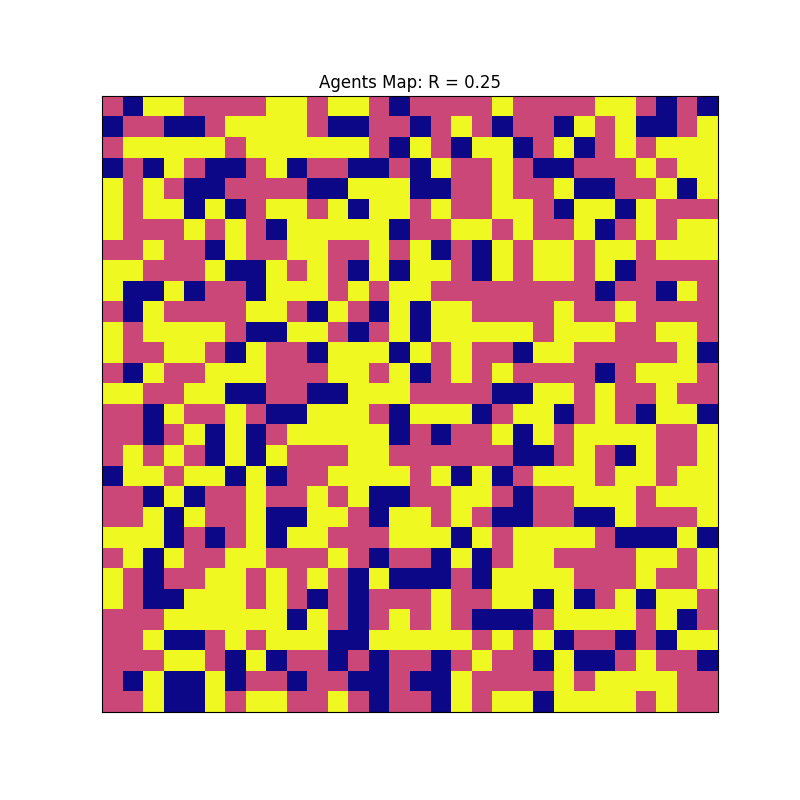

All agents are satisfied in step: 17


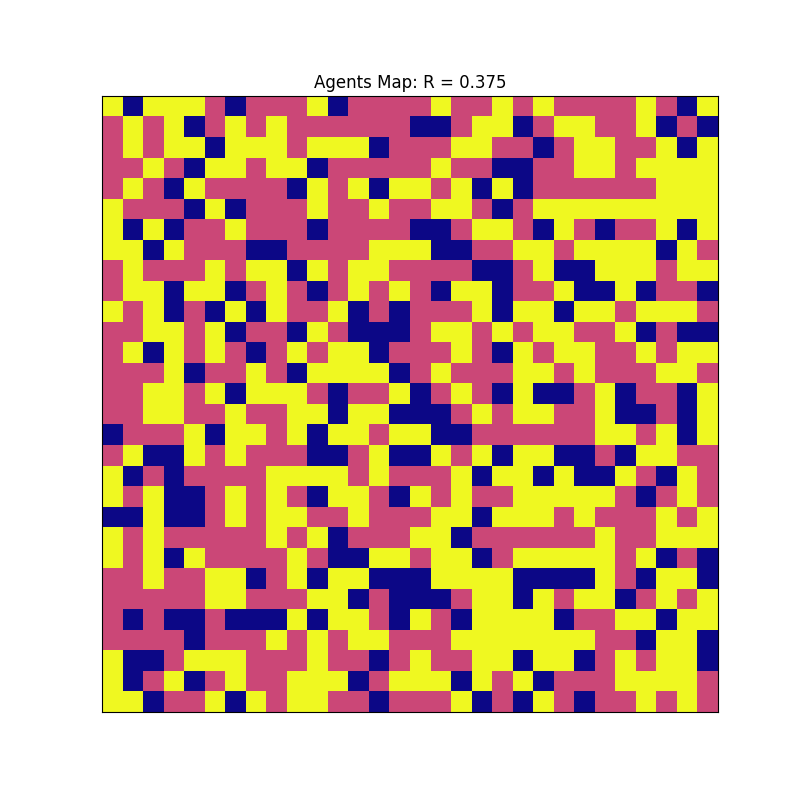

All agents are satisfied in step: 62


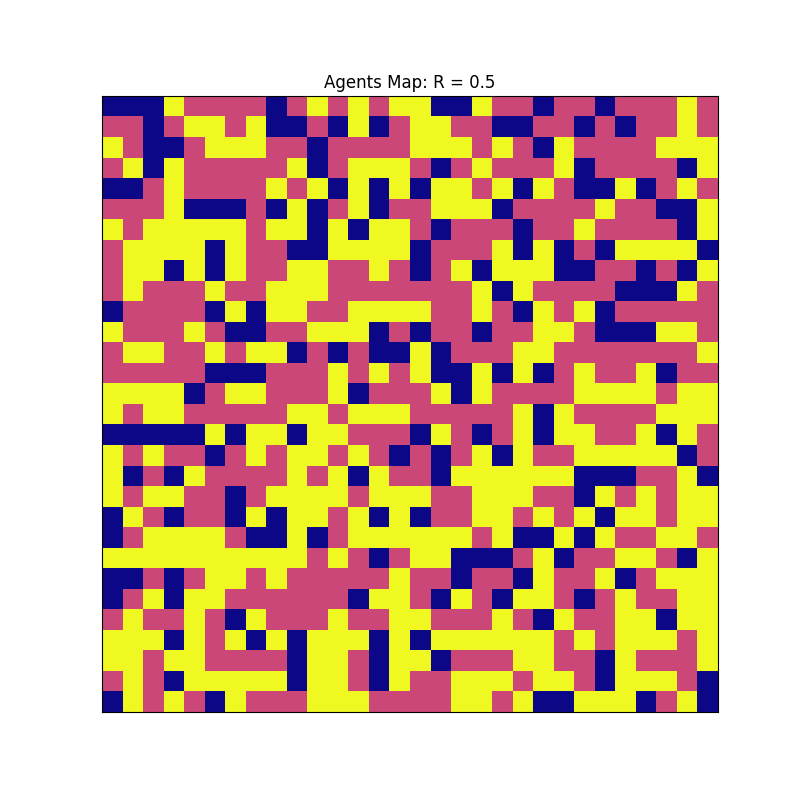

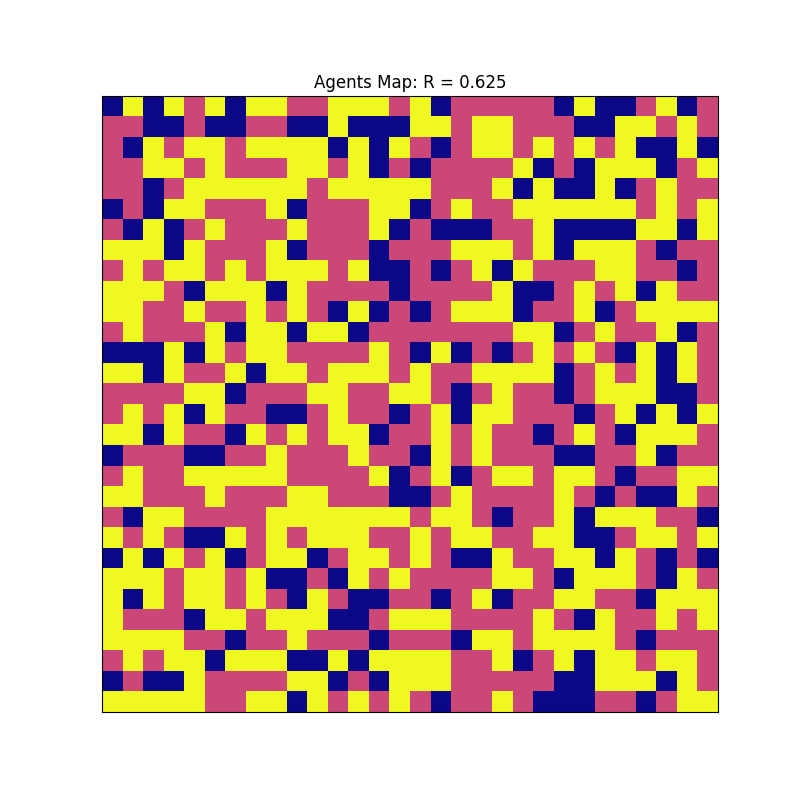

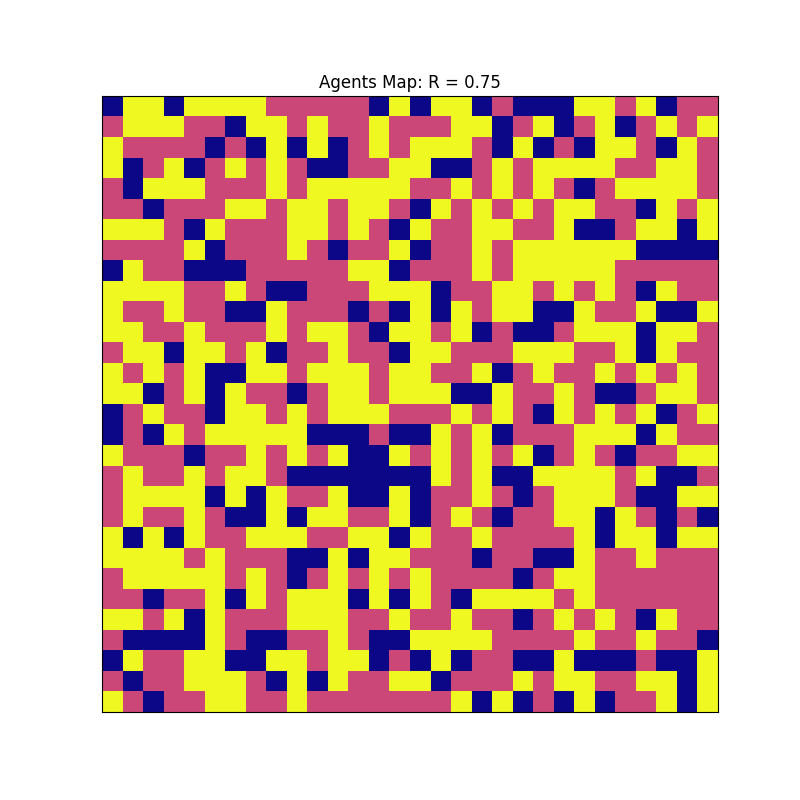

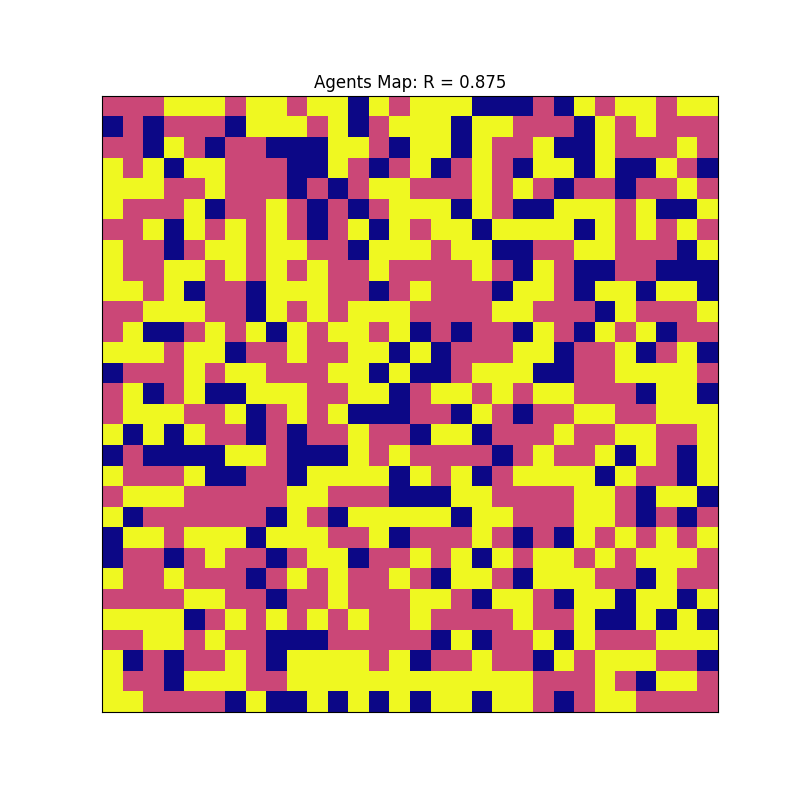

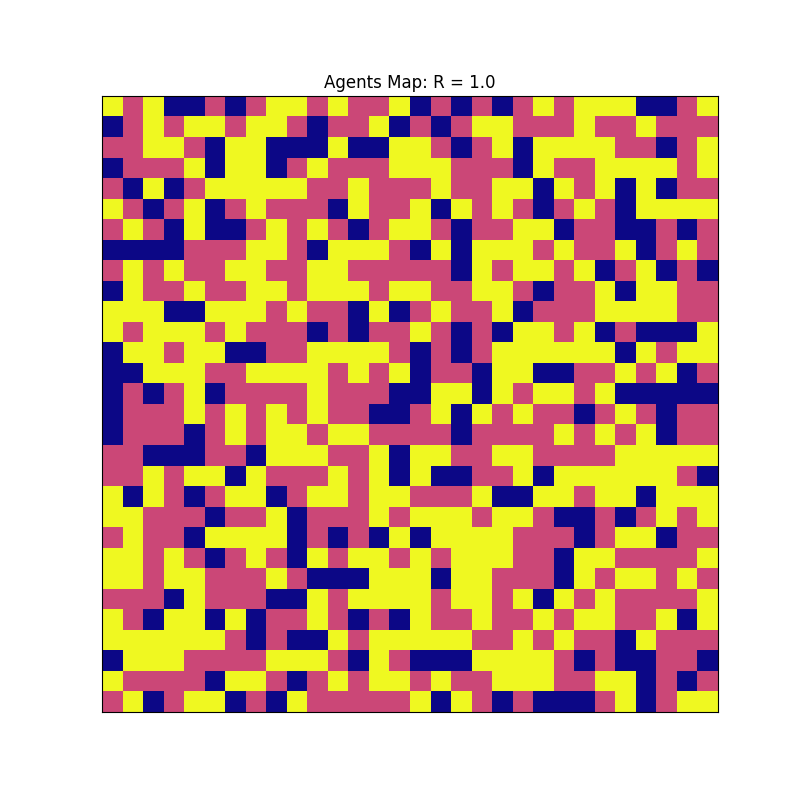

In [62]:
wants_move = []
for i, r in enumerate(R):
    results, frames, num_move = start_game(n=n, x_ratio=x_ratio, threshold=r, max_steps=max_steps, blank_ratio=blank_ratio)
    wants_move.append(num_move)

    fig = plt.figure(figsize=[8, 8])
    ax = plt.axes()


    def update_data(frame):
        ax.clear()
        ax.set_xticks([], [], fontsize=20)

        ax.set_title(f'Agents Map: R = {r}')
        ax.set_yticks([], [], fontsize=20)
        return [ax.imshow(results[frame], cmap=plt.cm.plasma)]

    animation = FuncAnimation(
        fig=fig,
        func=update_data,
        frames=frames,
        interval=120,
        blit=False
    )
    plt.close(fig)
    animation.save(f'Sch_model_{i}.gif', writer='imagemagick')
    display(Image(open(f'Sch_model_{i}.gif','rb').read()))

### Task 3.2

In [63]:
fig = go.Figure()

color_dict = px.colors.qualitative.Plotly

# Add traces
for i in range(len(R)):
    fig.add_trace(
        go.Scatter(x=np.arange(len(wants_move[i])),
                y=wants_move[i],
                line_color=color_dict[i],
                line_width=3,
                showlegend=True,
                name=f'R = {R[i]}'
                ))

# Add figure title
fig.update_layout(font_size = 20,
                  font_color='black',
                title = f"Unsatisfied households evolution",
                title_x = 0.5,
                legend_font_size = 20,
                plot_bgcolor = 'rgba(250,250,250,1)',
                width = 1000,
                height = 600,   
                # X-axis
                xaxis_title = "Time",
                xaxis_tickwidth = 3,
                xaxis_range = [0, max_steps],
                xaxis_ticks = 'outside',
                # Y-axis-right
                yaxis_title = "Number of households",
                yaxis_tickwidth = 3,                                           
                yaxis_ticks = 'outside',
                )   

fig.add_shape(type="rect",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0,
                x1=1.0,
                y1=1.0,
        line=dict(
            color="black",
                width=3,))
fig.layout.font.family = 'sans-serif'
fig.show()